In [331]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [332]:
def split_name_text(text_data):

    # Initialise a list
    entries = []

    # Extract the name and text part from each line
    for line in text_data:
        parts = line.split('/')
        if len(parts) >= 3:
            name = parts[2]
            entries.append(name)
    

    entries_df = pd.DataFrame(entries, columns=['Names'])

    entries = entries_df['Names'].tolist()

    # Return list
    return entries

In [333]:
def drop_duplicates(text_data):
    text_data_df = pd.DataFrame(text_data, columns=['Names'])
    text_data_df.drop_duplicates(inplace=True)
    text_data = text_data_df['Names'].tolist()

    return text_data

In [334]:
def average_wc(name, text_data):
    sum = 0
    count = 0
    average = 0

    for line in text_data:
        parts = line.split()
        text_num = parts[0]
        parts = line.split('/')
        if len(parts) >= 3:
            text_name = parts[2]

            if name == text_name:
                sum += int(text_num)
                count += 1

    average = round(sum/count)

    return average

In [335]:
def anonymise_names(name_text, anon_names):
    for name in name_text:
            found = False
            for anon_name in anon_names:
                if anon_name['og_name'] == name:
                    found = True
                    break
            if not found:
                sequential_number = len(anon_names) + 1
                entry = {'og_name': name, 'anon_name': f'Employee-{sequential_number}'}
                anon_names.append(entry)

    return [entry['anon_name'] for entry in anon_names], anon_names

    


In [336]:
text_files = ['./word_counts_2000.text', './word_counts_2001.text', './word_counts_2002.text']
all_wc = []
anon_names = []
for text_file in text_files:
    year_array = []
    with open(text_file, 'r') as file:
        text_data = file.readlines()
        

        name_text = split_name_text(text_data)
        name_text = drop_duplicates(name_text)
        
        
        file_name = os.path.basename(text_file)
        array_name = os.path.splitext(file_name)[0]

        for name in name_text:
            avg_wc = average_wc(name, text_data)
            
            entry = {'Name:': name, 'Word Count': avg_wc}
            year_array.append(entry)
            dict_entry = {'Year': array_name, 'Name': name, 'WC': avg_wc}
            all_wc.append(dict_entry)
        name_text, anon_names = anonymise_names(name_text, anon_names)
        
print(all_wc)
print(anon_names)




[{'Year': 'word_counts_2000', 'Name': 'allen-p', 'WC': 172}, {'Year': 'word_counts_2000', 'Name': 'arnold-j', 'WC': 199}, {'Year': 'word_counts_2000', 'Name': 'arora-h', 'WC': 199}, {'Year': 'word_counts_2000', 'Name': 'badeer-r', 'WC': 321}, {'Year': 'word_counts_2000', 'Name': 'bailey-s', 'WC': 153}, {'Year': 'word_counts_2000', 'Name': 'bass-e', 'WC': 335}, {'Year': 'word_counts_2000', 'Name': 'baughman-d', 'WC': 349}, {'Year': 'word_counts_2000', 'Name': 'beck-s', 'WC': 285}, {'Year': 'word_counts_2000', 'Name': 'brawner-s', 'WC': 165}, {'Year': 'word_counts_2000', 'Name': 'buy-r', 'WC': 203}, {'Year': 'word_counts_2000', 'Name': 'campbell-l', 'WC': 268}, {'Year': 'word_counts_2000', 'Name': 'carson-m', 'WC': 111}, {'Year': 'word_counts_2000', 'Name': 'cash-m', 'WC': 301}, {'Year': 'word_counts_2000', 'Name': 'corman-s', 'WC': 335}, {'Year': 'word_counts_2000', 'Name': 'cuilla-m', 'WC': 205}, {'Year': 'word_counts_2000', 'Name': 'dasovich-j', 'WC': 449}, {'Year': 'word_counts_2000'

In [337]:
for item in all_wc:
    for anon_name in anon_names:
        if item['Name'] == anon_name['og_name']:
            item['Name'] = anon_name['anon_name']

print(all_wc)


[{'Year': 'word_counts_2000', 'Name': 'Employee-1', 'WC': 172}, {'Year': 'word_counts_2000', 'Name': 'Employee-2', 'WC': 199}, {'Year': 'word_counts_2000', 'Name': 'Employee-3', 'WC': 199}, {'Year': 'word_counts_2000', 'Name': 'Employee-4', 'WC': 321}, {'Year': 'word_counts_2000', 'Name': 'Employee-5', 'WC': 153}, {'Year': 'word_counts_2000', 'Name': 'Employee-6', 'WC': 335}, {'Year': 'word_counts_2000', 'Name': 'Employee-7', 'WC': 349}, {'Year': 'word_counts_2000', 'Name': 'Employee-8', 'WC': 285}, {'Year': 'word_counts_2000', 'Name': 'Employee-9', 'WC': 165}, {'Year': 'word_counts_2000', 'Name': 'Employee-10', 'WC': 203}, {'Year': 'word_counts_2000', 'Name': 'Employee-11', 'WC': 268}, {'Year': 'word_counts_2000', 'Name': 'Employee-12', 'WC': 111}, {'Year': 'word_counts_2000', 'Name': 'Employee-13', 'WC': 301}, {'Year': 'word_counts_2000', 'Name': 'Employee-14', 'WC': 335}, {'Year': 'word_counts_2000', 'Name': 'Employee-15', 'WC': 205}, {'Year': 'word_counts_2000', 'Name': 'Employee-1

In [338]:
df = pd.DataFrame(all_wc)
df['Year'] = df['Year'].str.replace('word_counts_', '')
df.notnull()
print(df)

     Year          Name    WC
0    2000    Employee-1   172
1    2000    Employee-2   199
2    2000    Employee-3   199
3    2000    Employee-4   321
4    2000    Employee-5   153
5    2000    Employee-6   335
6    2000    Employee-7   349
7    2000    Employee-8   285
8    2000    Employee-9   165
9    2000   Employee-10   203
10   2000   Employee-11   268
11   2000   Employee-12   111
12   2000   Employee-13   301
13   2000   Employee-14   335
14   2000   Employee-15   205
15   2000   Employee-16   449
16   2000   Employee-17   271
17   2000   Employee-18  1086
18   2000   Employee-19   282
19   2000   Employee-20   351
20   2000   Employee-21   359
21   2000   Employee-22   105
22   2000   Employee-23   460
23   2000   Employee-24   209
24   2000   Employee-25   343
25   2000   Employee-26   235
26   2000   Employee-27   192
27   2000   Employee-28   236
28   2000   Employee-29   227
29   2000   Employee-30   249
30   2000   Employee-31   124
31   2000   Employee-32   275
32   2000 

In [339]:
pivot_df = df.pivot_table(index='Name', columns='Year', values='WC')
pivot_df = pivot_df.dropna()

print(pivot_df)

Year            2000   2001    2002
Name                               
Employee-1     172.0  245.0   138.0
Employee-10    203.0  253.0   321.0
Employee-100   300.0  234.0   177.0
Employee-102   465.0  231.0   228.0
Employee-103   130.0  211.0   311.0
Employee-11    268.0  354.0   197.0
Employee-12    111.0  536.0   313.0
Employee-13    301.0  398.0   841.0
Employee-14    335.0  386.0   318.0
Employee-15    205.0  661.0  2863.0
Employee-16    449.0  781.0   432.0
Employee-18   1086.0  391.0   205.0
Employee-19    282.0  277.0   145.0
Employee-2     199.0  374.0   162.0
Employee-22    105.0  263.0   516.0
Employee-23    460.0  511.0  1560.0
Employee-24    209.0  221.0   338.0
Employee-27    192.0  254.0   307.0
Employee-28    236.0  257.0   295.0
Employee-29    227.0  269.0   261.0
Employee-3     199.0  398.0   143.0
Employee-30    249.0  235.0   214.0
Employee-31    124.0  390.0   977.0
Employee-35    854.0  282.0   183.0
Employee-4     321.0   40.0   256.0
Employee-40    230.0  285.0 

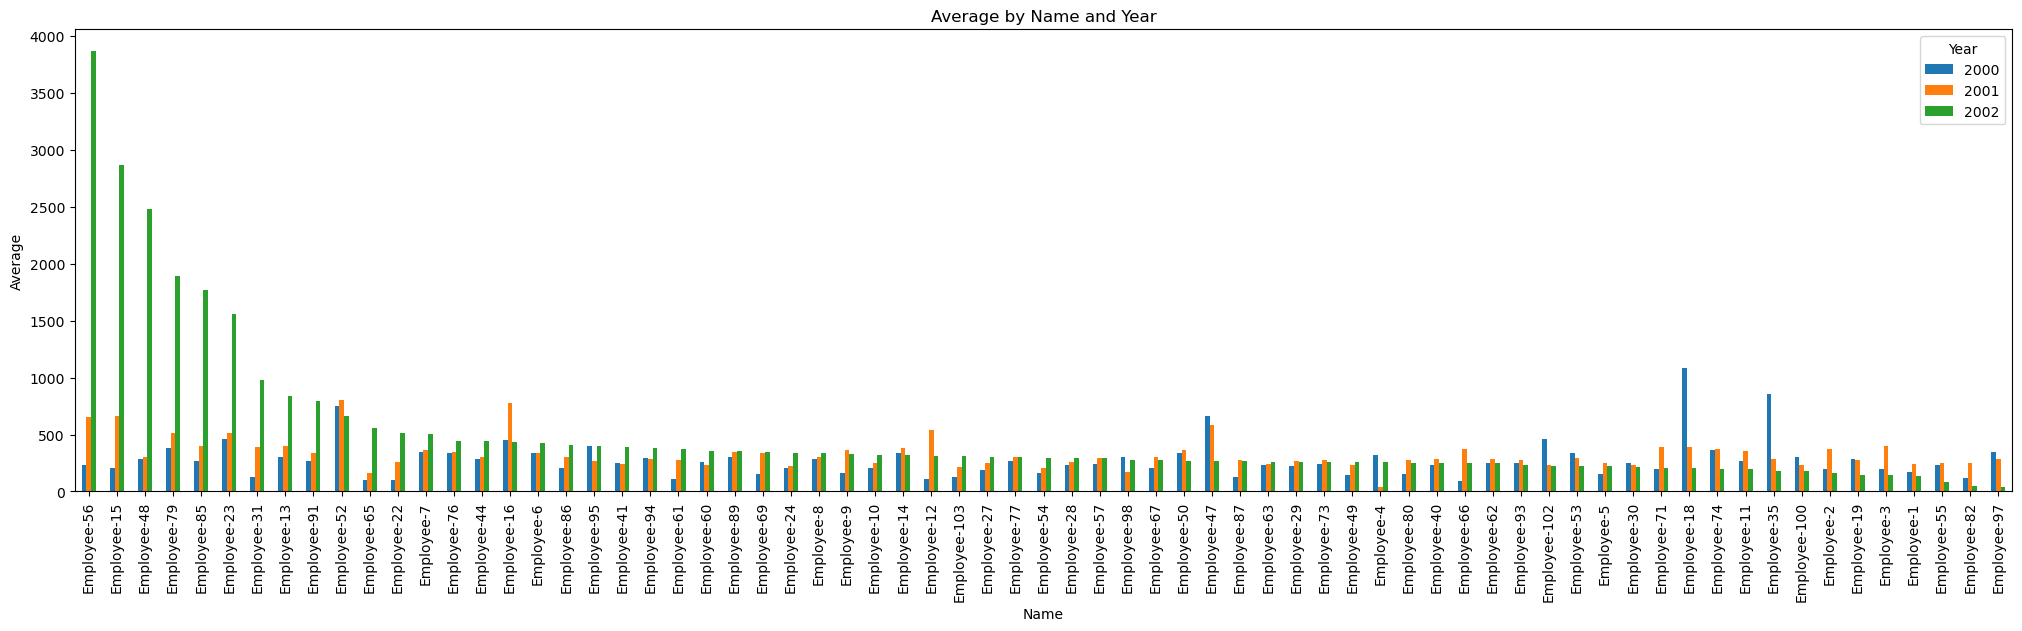

In [340]:
pivot_df_sorted = pivot_df.sort_values(by='2002', ascending=False)

pivot_df_sorted.plot(kind='bar', figsize=(25, 6))
plt.xlabel('Name')
plt.ylabel('Average')
plt.title('Average by Name and Year')
plt.legend(title='Year')
plt.show()

In [341]:
pivot_df['difference_01_02'] = pivot_df['2002']-pivot_df['2001']

print(pivot_df)

Year            2000   2001    2002  difference_01_02
Name                                                 
Employee-1     172.0  245.0   138.0            -107.0
Employee-10    203.0  253.0   321.0              68.0
Employee-100   300.0  234.0   177.0             -57.0
Employee-102   465.0  231.0   228.0              -3.0
Employee-103   130.0  211.0   311.0             100.0
Employee-11    268.0  354.0   197.0            -157.0
Employee-12    111.0  536.0   313.0            -223.0
Employee-13    301.0  398.0   841.0             443.0
Employee-14    335.0  386.0   318.0             -68.0
Employee-15    205.0  661.0  2863.0            2202.0
Employee-16    449.0  781.0   432.0            -349.0
Employee-18   1086.0  391.0   205.0            -186.0
Employee-19    282.0  277.0   145.0            -132.0
Employee-2     199.0  374.0   162.0            -212.0
Employee-22    105.0  263.0   516.0             253.0
Employee-23    460.0  511.0  1560.0            1049.0
Employee-24    209.0  221.0 

In [351]:
yearly_statistics = df.groupby('Year').describe()
print(yearly_statistics)

         WC                                                           
      count        mean         std   min    25%    50%    75%     max
Year                                                                  
2000  103.0  269.893204  150.917970  78.0  186.0  247.0  313.0  1086.0
2001  149.0  330.483221  122.615010  40.0  254.0  297.0  376.0   799.0
2002  103.0  459.524272  560.112696  39.0  240.5  294.0  420.5  3863.0


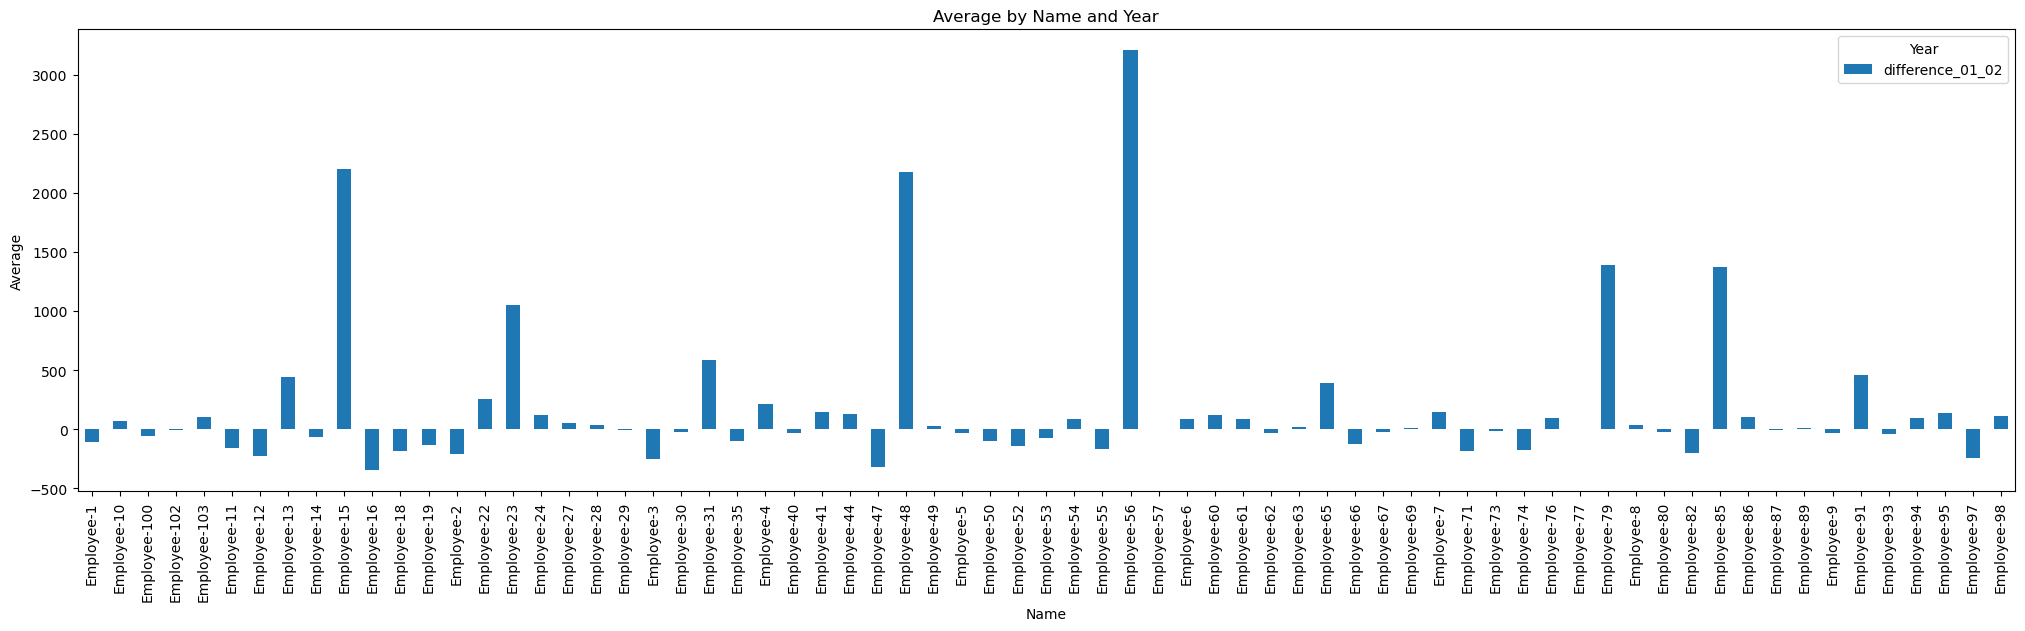

In [343]:
pivot_df['difference_01_02'].plot(kind='bar', figsize=(25, 6))
plt.xlabel('Name')
plt.ylabel('Average')
plt.title('Average by Name and Year')
plt.legend(title='Year')
plt.show()

In [344]:
count = 0
sum = 0

for number in pivot_df['difference_01_02']:
    sum += number
    count += 1
average = sum/count

print(average)

169.5072463768116


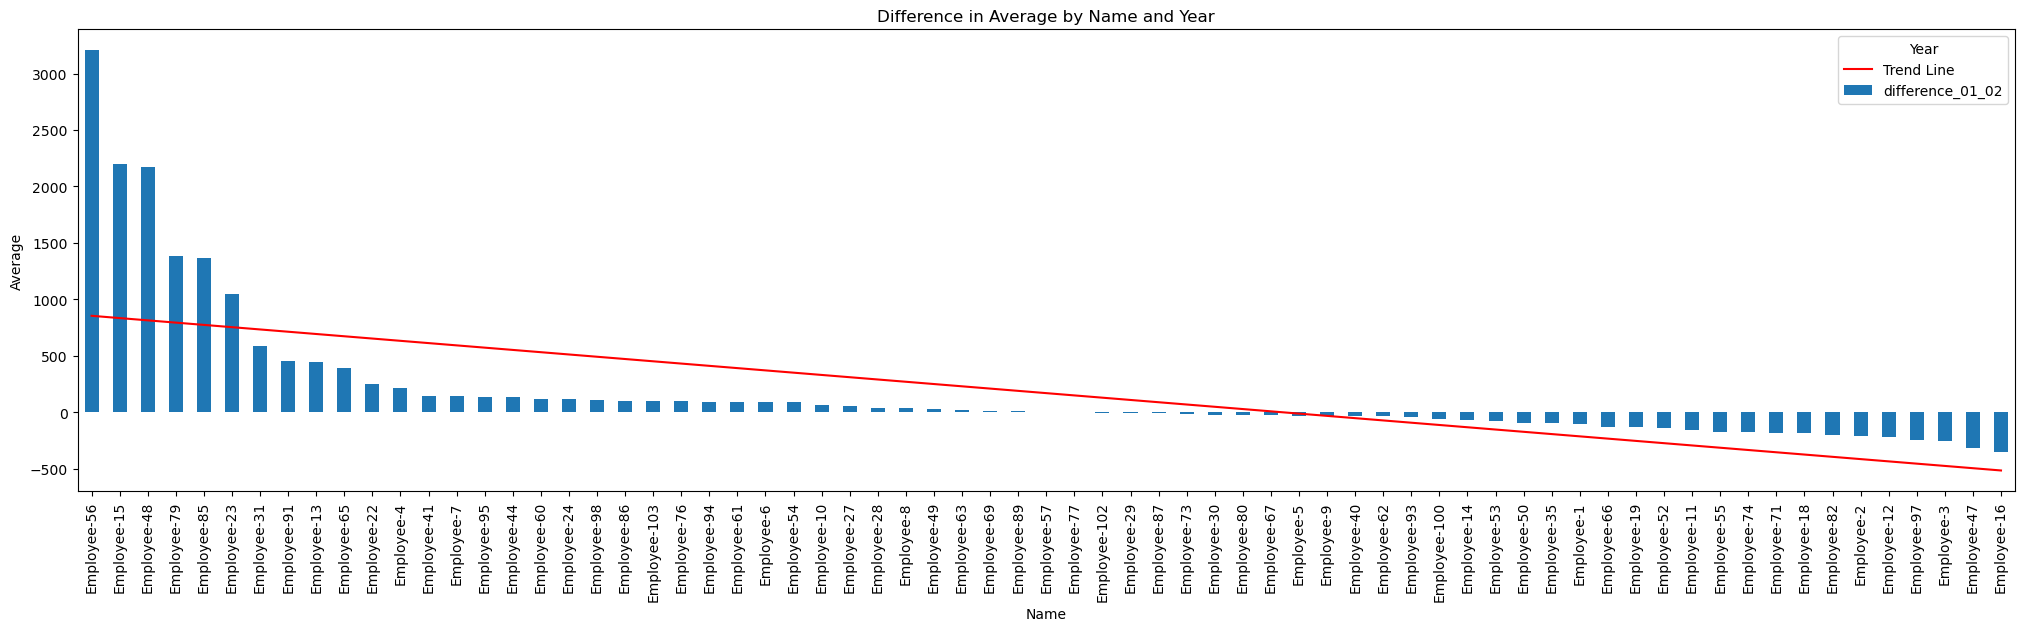

In [345]:
# Sort the DataFrame by the values in the 'difference_01_02' column
pivot_df_sorted = pivot_df.sort_values(by='difference_01_02', ascending=False)

# Plot the sorted bar chart
pivot_df_sorted['difference_01_02'].plot(kind='bar', figsize=(25, 6))

# Fit a trend line (linear regression)
x = np.arange(len(pivot_df_sorted))
y = pivot_df_sorted['difference_01_02'].values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(x, p(x), color='red', label='Trend Line')

# Add labels and title
plt.xlabel('Name')
plt.ylabel('Average')
plt.title('Difference in Average by Name and Year')

# Show the legend with a title
plt.legend(title='Year')

# Show the plot
plt.show()

## Count of emails by year

In [346]:
names_dict = []

for text_file in text_files:
    file_name = os.path.basename(text_file)
    year_name = os.path.splitext(file_name)[0].strip('word_counts_')

    name_count = {}

    with open(text_file, 'r') as file:
        lines = file.readlines()

        names_array = split_name_text(lines)

        for name in names_array:
            if name in name_count:
                name_count[name] += 1
            else:
                name_count[name] = 1

        # Split name and count before appending to names_dict
        for name, count in name_count.items():
            names_dict.append({'Year': year_name, 'Name': name, 'Count': count})

print(names_dict)

[{'Year': '2000', 'Name': 'allen-p', 'Count': 1307}, {'Year': '2000', 'Name': 'arnold-j', 'Count': 1832}, {'Year': '2000', 'Name': 'arora-h', 'Count': 62}, {'Year': '2000', 'Name': 'badeer-r', 'Count': 851}, {'Year': '2000', 'Name': 'bailey-s', 'Count': 1}, {'Year': '2000', 'Name': 'bass-e', 'Count': 5727}, {'Year': '2000', 'Name': 'baughman-d', 'Count': 176}, {'Year': '2000', 'Name': 'beck-s', 'Count': 7241}, {'Year': '2000', 'Name': 'brawner-s', 'Count': 286}, {'Year': '2000', 'Name': 'buy-r', 'Count': 442}, {'Year': '2000', 'Name': 'campbell-l', 'Count': 2336}, {'Year': '2000', 'Name': 'carson-m', 'Count': 655}, {'Year': '2000', 'Name': 'cash-m', 'Count': 1317}, {'Year': '2000', 'Name': 'corman-s', 'Count': 66}, {'Year': '2000', 'Name': 'cuilla-m', 'Count': 385}, {'Year': '2000', 'Name': 'dasovich-j', 'Count': 9301}, {'Year': '2000', 'Name': 'davis-d', 'Count': 1285}, {'Year': '2000', 'Name': 'dean-c', 'Count': 593}, {'Year': '2000', 'Name': 'delainey-d', 'Count': 2938}, {'Year': '2

In [347]:
for item in names_dict:
    for anon_name in anon_names:
        if item['Name'] == anon_name['og_name']:
            item['Name'] = anon_name['anon_name']

print(names_dict)

[{'Year': '2000', 'Name': 'Employee-1', 'Count': 1307}, {'Year': '2000', 'Name': 'Employee-2', 'Count': 1832}, {'Year': '2000', 'Name': 'Employee-3', 'Count': 62}, {'Year': '2000', 'Name': 'Employee-4', 'Count': 851}, {'Year': '2000', 'Name': 'Employee-5', 'Count': 1}, {'Year': '2000', 'Name': 'Employee-6', 'Count': 5727}, {'Year': '2000', 'Name': 'Employee-7', 'Count': 176}, {'Year': '2000', 'Name': 'Employee-8', 'Count': 7241}, {'Year': '2000', 'Name': 'Employee-9', 'Count': 286}, {'Year': '2000', 'Name': 'Employee-10', 'Count': 442}, {'Year': '2000', 'Name': 'Employee-11', 'Count': 2336}, {'Year': '2000', 'Name': 'Employee-12', 'Count': 655}, {'Year': '2000', 'Name': 'Employee-13', 'Count': 1317}, {'Year': '2000', 'Name': 'Employee-14', 'Count': 66}, {'Year': '2000', 'Name': 'Employee-15', 'Count': 385}, {'Year': '2000', 'Name': 'Employee-16', 'Count': 9301}, {'Year': '2000', 'Name': 'Employee-17', 'Count': 1285}, {'Year': '2000', 'Name': 'Employee-18', 'Count': 593}, {'Year': '2000

In [348]:
names_dict_df = pd.DataFrame(names_dict)

print(names_dict_df)

     Year          Name  Count
0    2000    Employee-1   1307
1    2000    Employee-2   1832
2    2000    Employee-3     62
3    2000    Employee-4    851
4    2000    Employee-5      1
5    2000    Employee-6   5727
6    2000    Employee-7    176
7    2000    Employee-8   7241
8    2000    Employee-9    286
9    2000   Employee-10    442
10   2000   Employee-11   2336
11   2000   Employee-12    655
12   2000   Employee-13   1317
13   2000   Employee-14     66
14   2000   Employee-15    385
15   2000   Employee-16   9301
16   2000   Employee-17   1285
17   2000   Employee-18    593
18   2000   Employee-19   2938
19   2000   Employee-20    482
20   2000   Employee-21    514
21   2000   Employee-22   1209
22   2000   Employee-23    506
23   2000   Employee-24   8857
24   2000   Employee-25   3630
25   2000   Employee-26    900
26   2000   Employee-27   8016
27   2000   Employee-28     36
28   2000   Employee-29   1639
29   2000   Employee-30    426
30   2000   Employee-31    492
31   200

In [363]:
names_dict_pivot = names_dict_df.pivot_table(index='Name', columns='Year', values='Count')
names_dict_pivot = names_dict_pivot.dropna()
print(names_dict_pivot)


Year             2000     2001    2002
Name                                  
Employee-1     1307.0   1706.0     3.0
Employee-10     442.0   1738.0   237.0
Employee-100      1.0   2370.0  1070.0
Employee-102    120.0   1321.0   121.0
Employee-103      4.0    288.0   262.0
Employee-11    2336.0   3901.0     8.0
Employee-12     655.0    481.0   264.0
Employee-13    1317.0   1636.0     3.0
Employee-14      66.0    626.0  1304.0
Employee-15     385.0    642.0     2.0
Employee-16    9301.0  18353.0    15.0
Employee-18     593.0   1742.0    95.0
Employee-19    2938.0    616.0     6.0
Employee-2     1832.0   3057.0     3.0
Employee-22    1209.0    554.0   357.0
Employee-23     506.0    721.0     1.0
Employee-24    8857.0   3789.0    75.0
Employee-27    8016.0   2161.0  1696.0
Employee-28      36.0    217.0   325.0
Employee-29    1639.0   2178.0   404.0
Employee-3       62.0    582.0     7.0
Employee-30     426.0   2200.0   345.0
Employee-31     492.0   1736.0     8.0
Employee-35       2.0    

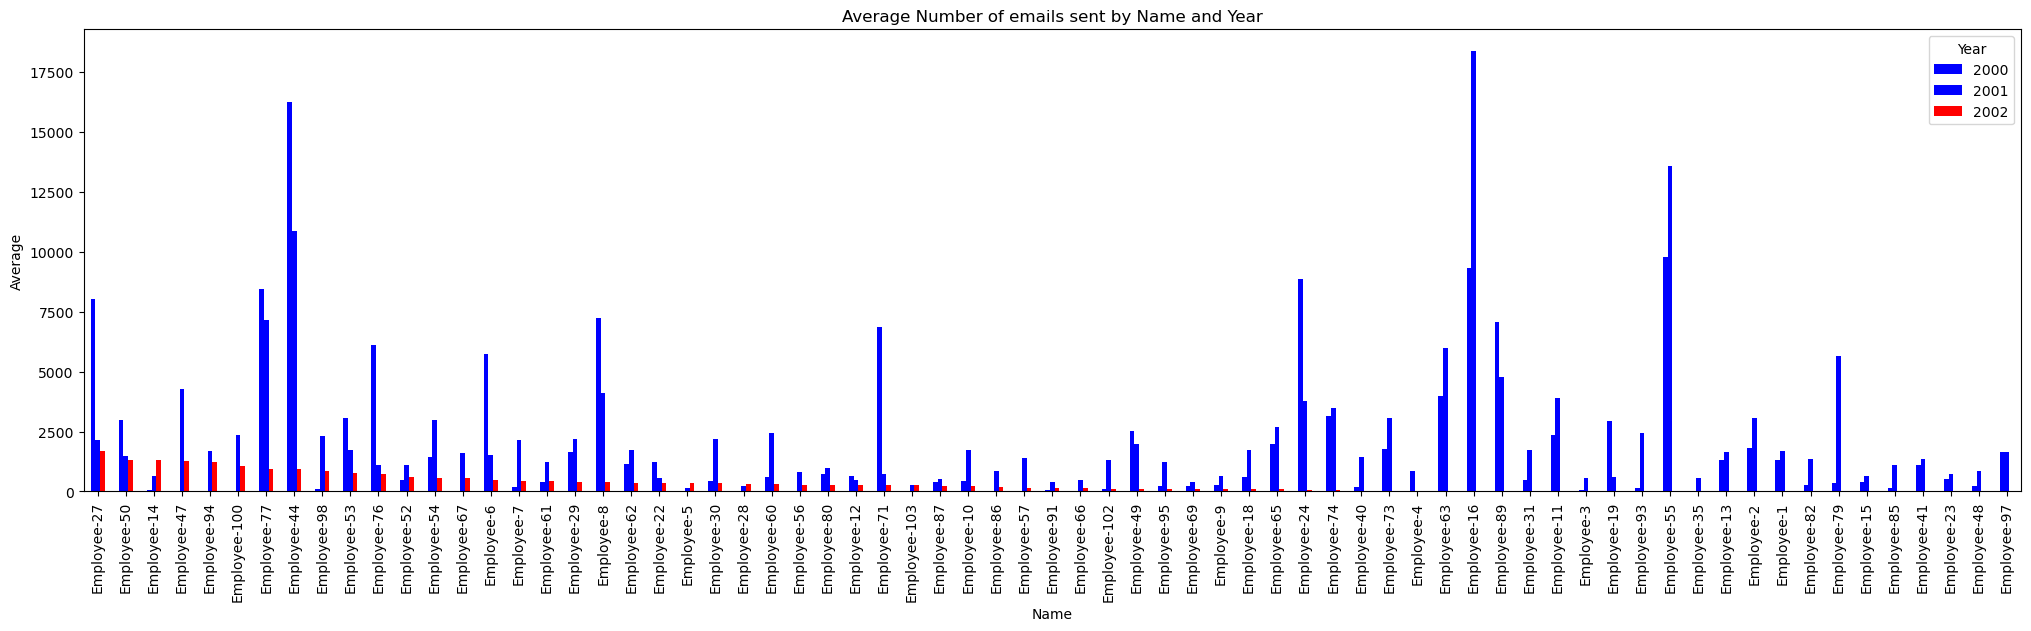

In [371]:
pivot_names_sorted = names_dict_pivot.sort_values(by='2002', ascending=False)
# Specify colors for the bars, with a different color for the desired year
colors = ['blue' if year != '2002' else 'red' for year in pivot_names_sorted.columns]

# Plot the bar chart with specified colors
pivot_names_sorted.plot(kind='bar', figsize=(25, 6), color=colors)
plt.xlabel('Name')
plt.ylabel('Average')
plt.title('Average Number of emails sent by Name and Year')
plt.legend(title='Year')
plt.show()

In [365]:
yearly_statistics = names_dict_df.groupby('Year').describe()
print(yearly_statistics)

      Count                                                               
      count         mean          std  min    25%     50%     75%      max
Year                                                                      
2000  103.0  1905.378641  2987.970477  1.0  128.5   619.0  2101.5  16256.0
2001  149.0  1831.510067  2520.547918  2.0  554.0  1100.0  1976.0  18353.0
2002  103.0   348.135922   417.424222  1.0   14.5   233.0   465.5   1943.0


In [ ]:
names_dict_pivot['difference_01_02'] = names_dict_pivot['2002'] - names_dict_pivot['2001']

print(names_dict_pivot)

Year             2000     2001    2002  difference_01_02
Name                                                    
Employee-1     1307.0   1706.0     3.0           -1703.0
Employee-10     442.0   1738.0   237.0           -1501.0
Employee-100      1.0   2370.0  1070.0           -1300.0
Employee-102    120.0   1321.0   121.0           -1200.0
Employee-103      4.0    288.0   262.0             -26.0
Employee-11    2336.0   3901.0     8.0           -3893.0
Employee-12     655.0    481.0   264.0            -217.0
Employee-13    1317.0   1636.0     3.0           -1633.0
Employee-14      66.0    626.0  1304.0             678.0
Employee-15     385.0    642.0     2.0            -640.0
Employee-16    9301.0  18353.0    15.0          -18338.0
Employee-18     593.0   1742.0    95.0           -1647.0
Employee-19    2938.0    616.0     6.0            -610.0
Employee-2     1832.0   3057.0     3.0           -3054.0
Employee-22    1209.0    554.0   357.0            -197.0
Employee-23     506.0    721.0 

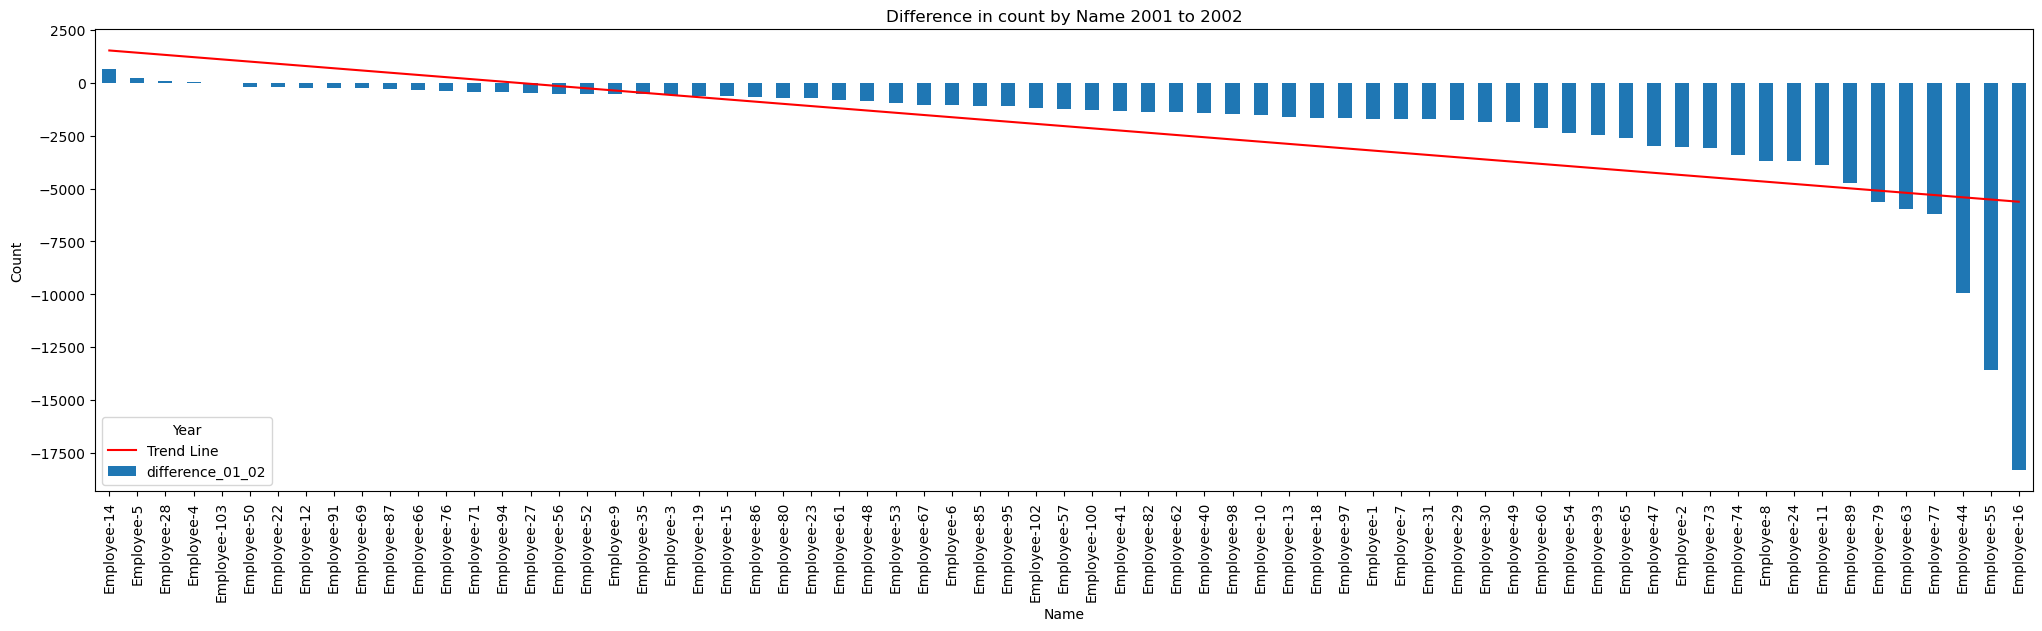

In [ ]:
# Sort the DataFrame by the values in the 'difference_01_02' column
names_dict_pivot_sorted = names_dict_pivot.sort_values(by='difference_01_02', ascending=False)

# Plot the sorted bar chart
names_dict_pivot_sorted['difference_01_02'].plot(kind='bar', figsize=(25, 6))

# Fit a trend line (linear regression)
x = np.arange(len(names_dict_pivot_sorted))
y = names_dict_pivot_sorted['difference_01_02'].values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(x, p(x), color='red', label='Trend Line')

# Add labels and title
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Difference in count by Name 2001 to 2002')

# Show the legend with a title
plt.legend(title='Year')

# Show the plot
plt.show()